# Rainfall record processing and visualization

© 2024 Daniel F. Ruiz, Exneyder A. Montoya-Araque y Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/irrigation_and_drainage_eng/blob/main/notebooks/rainfall_record_processing.ipynb).


## Required modules and global setup for plots

In [1]:
import os
import subprocess
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    subprocess.run('pip install ipympl', shell=True);
    from google.colab import output, files
    output.enable_custom_widget_manager()
else:
    import tkinter as tk
    from tkinter.filedialog import askopenfilename

# Figures setup
%matplotlib widget
# plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "DejaVu Serif",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)

## Potential evapotranspiration estimated as a function of the basin elevation

In [2]:
basin_elevation = 1500  # [msnn]

ETP = 4.658 * np.exp(-0.0002*basin_elevation)  # [mm/day]  Ecuación de Cenicafé
print(f'ETP = {ETP:.2f} mm/day')

ETP = 3.45 mm/day


## Loading the rainfall record

In [3]:
if 'google.colab' in str(get_ipython()):
    file = files.upload()
    df = pd.read_excel(list(file.values())[0])
else:
    tk.Tk().withdraw() # part of the import if you are not using other tkinter functions
    file = askopenfilename()
    df = pd.read_excel(file)
df

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,14a15,15a16,16a17,17a18,18a19,19a2,2a21,21a22,22a23,23a24
0,1972,Enero,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1972,Enero,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
2,1972,Enero,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
3,1972,Enero,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
4,1972,Enero,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.3,0.1,0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,1999,Diciembre,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
10223,1999,Diciembre,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
10224,1999,Diciembre,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
10225,1999,Diciembre,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
df['Mes'].unique()

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre ', 'Noviembre', 'Diciembre'],
      dtype=object)

## Creating a field with the date properly formatted 

In [5]:
months_two_parse = {
    "Enero": "January",
    "Febrero": "February",
    "Marzo": "March",
    "Abril": "April",
    "Mayo": "May",
    "Junio": "June",
    "Julio": "July",
    "Agosto": "August",
    "Septiembre": "September",
    "Octubre ": "October",
    "Octubre": "October",
    "Noviembre": "November",
    "Diciembre": "December",
}

In [6]:
# Create a field with the date
df_date = pd.DataFrame({'year': df['Año'],
                        'month': pd.to_datetime(df['Mes'].map(months_two_parse), format='%B').dt.month,
                        'day': df['Dias']})
df['date'] = pd.to_datetime(df_date)
df['date'] = pd.to_datetime(df_date)
# df['next_day'] = df['date'] + pd.DateOffset(days=1)


## Create fields with the daily rain and the daily evapotranspiration

In [7]:
# Create a field with the daily_rain rainfall
df['daily_rain'] = df.iloc[:, 3:3+24].sum(axis=1, numeric_only=True)
df['daily_ETR'] = ETP * np.tanh(df['daily_rain'] / ETP)
df.sample(5)

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,17a18,18a19,19a2,2a21,21a22,22a23,23a24,date,daily_rain,daily_ETR
3782,1982,Mayo,10,2.0,1.5,0.1,0.9,0.0,0.1,0.5,...,0,0.0,0.0,0.0,0.0,0.0,0,1982-05-10,5.1,3.109394
8985,1996,Agosto,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,1996-08-07,0.1,0.099972
2697,1979,Mayo,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,1979-05-21,0.0,0.000000
8106,1994,Marzo,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.2,0.0,0.0,0.0,0.1,1994-03-12,1.0,0.972916
8025,1993,Diciembre,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0,1993-12-21,0.0,0.000000


## Get the data for a spefic date

In [8]:
date = '1972-01-27'

df_day = df.loc[df['date'] == date]
df_day

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,17a18,18a19,19a2,2a21,21a22,22a23,23a24,date,daily_rain,daily_ETR
26,1972,Enero,27,2.6,4.5,1.3,2.7,1.4,0.2,0.9,...,0,0.0,0.1,0.0,0.0,0.0,0,1972-01-27,19.4,3.450641


## Get the data for a range of dates

In [9]:
date_ini = '1972-01-01'
date_end = '1976-12-31'

df_range = df.loc[(df['date'] >= date_ini) & (df['date'] <= date_end)].copy()
df_range['cumulative_rain'] = np.cumsum(df_range['daily_rain'])
os.makedirs('./output_data', exist_ok=True)
# Save the processed data
df_range.to_excel('./output_data/processed_data.xlsx')
df_range.sample(5)

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,18a19,19a2,2a21,21a22,22a23,23a24,date,daily_rain,daily_ETR,cumulative_rain
172,1972,Junio,21,0.0,0.0,0.0,0.0,2.6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,1972-06-21,3.6,2.688710,933.8
192,1972,Julio,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.2,0.0,0.3,1.5,0.2,0,1972-07-11,8.2,3.391687,968.3
1473,1976,Enero,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1976-01-13,0.0,0.000000,7081.7
784,1974,Febrero,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1974-02-23,0.0,0.000000,3650.0
1105,1975,Enero,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1975-01-10,0.1,0.099972,5193.8


## Plot the data between the range of dates

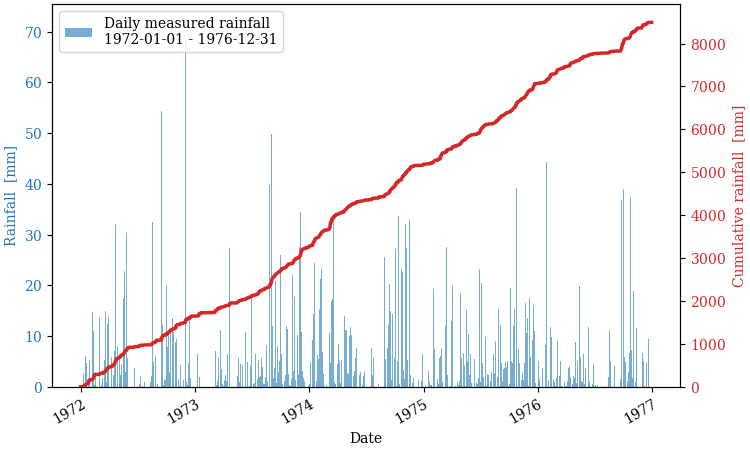

In [10]:
fig, ax1 = plt.subplots(figsize=(7.5, 4.5))
ax2 = ax1.twinx()

# Daily rainfall
ax1.bar(df_range['date'] - datetime.timedelta(days=1), df_range['daily_rain'], color=mpl.colors.to_rgba('C0', 0.6), #edgecolor='k', 
        width=1, align='edge', label=f'Daily measured rainfall\n{date_ini} - {date_end}')

# Cumulative rainfall as a line plot considering the edges of the daily rainfall
date_range = pd.concat([pd.Series([df_range['date'].iloc[0] - datetime.timedelta(days=1)]), df_range['date']])
cumulative_rainfall = np.hstack((0, df_range['cumulative_rain']))
ax2.plot(date_range, cumulative_rainfall, color='C3', lw=2.5)

ax1.legend(loc='upper left')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall  [mm]', color='C0')
ax2.set_ylabel('Cumulative rainfall  [mm]', color='C3')
ax2.set_ylim(0, ax2.get_ylim()[1])

fig.canvas.header_visible = False
fig.canvas.toolbar_position = 'bottom'
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.setp(ax1.get_yticklabels(), color='C0')
plt.setp(ax2.get_yticklabels(), color='C3')
plt.show()

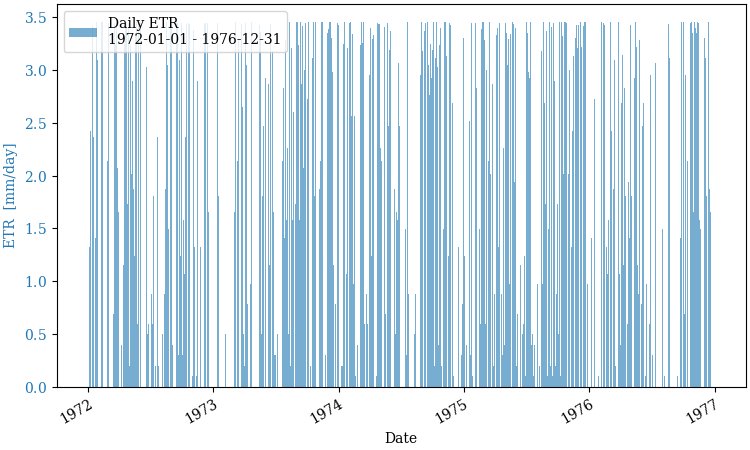

In [11]:
fig, ax1 = plt.subplots(figsize=(7.5, 4.5))

# Daily ETR
ax1.bar(df_range['date'], df_range['daily_ETR'], color=mpl.colors.to_rgba('C0', 0.6), #edgecolor='k',
        width=1, align='edge', label=f'Daily ETR\n{date_ini} - {date_end}')

ax1.legend(loc='upper left')
ax1.set_xlabel('Date')
ax1.set_ylabel('ETR  [mm/day]', color='C0')

fig.canvas.header_visible = False
fig.canvas.toolbar_position = 'bottom'
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.setp(ax1.get_yticklabels(), color='C0')
plt.show()

## Get the monthly mean cumulative rainfall

In [12]:
df_range_monthly = df_range[['date', 'daily_rain', 'daily_ETR', 'cumulative_rain']].copy()
df_range_monthly['month'] = df_range_monthly['date'].dt.month
df_range_monthly['year_month'] = df_range_monthly['date'].dt.to_period('M')
# Assign to all the month of each year the same cumulative rainfall as the sum of the daily rainfall of that month
df_range_monthly['monthly_cumulative_rain'] = df_range_monthly.groupby(['year_month'])['daily_rain'].transform('sum')
df_range_monthly = pd.DataFrame(df_range_monthly.groupby('year_month')['monthly_cumulative_rain'].max())
df_range_monthly['month'] = df_range_monthly.index.month
df_range_monthly.sample(5)

,monthly_cumulative_rain,month
year_month,,
1975-05,180.9,5
1972-05,224.1,5
1975-10,248.2,10
1972-03,171.3,3
1976-05,122.5,5


In [13]:
monthly_mean_cumulative_rain =  pd.DataFrame({'monthly_mean_cumulative_rain': df_range_monthly.groupby('month')['monthly_cumulative_rain'].mean()})
# index as the month number
monthly_mean_cumulative_rain['month'] = pd.to_datetime(monthly_mean_cumulative_rain.index, format='%m').month_name()
monthly_mean_cumulative_rain.reset_index(drop=True, inplace=True)

# Save the processed data
os.makedirs('./output_data', exist_ok=True)
monthly_mean_cumulative_rain.to_excel('./output_data/monthly_mean_cumulative_rain.xlsx')
monthly_mean_cumulative_rain

,monthly_mean_cumulative_rain,month
0,119.52,January
1,127.96,February
2,188.20,March
3,139.52,April
4,149.68,May
5,65.50,June
6,80.86,July
7,106.28,August
8,185.06,September
9,229.44,October


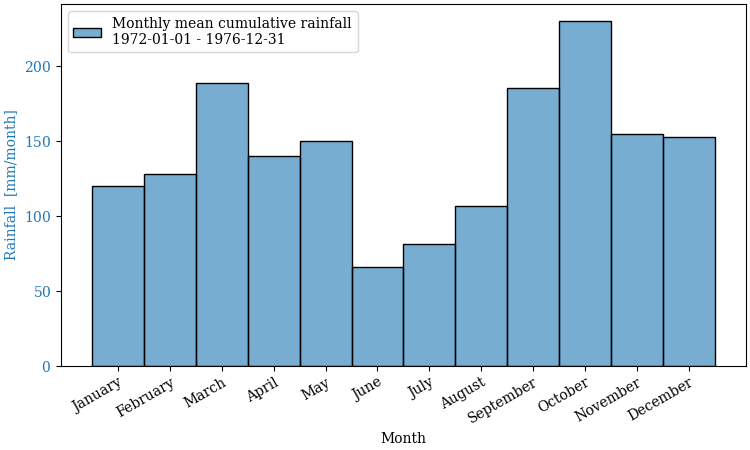

In [14]:
fig, ax1 = plt.subplots(figsize=(7.5, 4.5))

ax1.bar(monthly_mean_cumulative_rain['month'], monthly_mean_cumulative_rain['monthly_mean_cumulative_rain'], color=mpl.colors.to_rgba('C0', 0.6),
        edgecolor='k', width=1, align='center', label=f'Monthly mean cumulative rainfall\n{date_ini} - {date_end}')

ax1.legend(loc='upper left')
ax1.set_xlabel('Month')
ax1.set_ylabel('Rainfall  [mm/month]', color='C0')

# ax1.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonth=range(0, 13)))
# ax1.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))


fig.canvas.header_visible = False
fig.canvas.toolbar_position = 'bottom'
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.setp(ax1.get_yticklabels(), color='C0')
plt.show()

## Recompute and plot the record averaging every $n$ days

In [15]:
n_days = 30

df_range_avg = df_range.iloc[n_days-1::n_days-1].copy()
df_range_avg['avg_daily_rain'] = np.diff(df_range_avg['cumulative_rain'], prepend=0) / n_days
df_range_avg['avg_ETR'] = ETP * np.tanh(df_range_avg['avg_daily_rain'] / ETP) 
df_range_avg['avg_cumulative'] = df_range_avg['avg_daily_rain'].cumsum() * n_days
# Create a field with the start date of the range (left edges)
df_range_avg['start_date'] = df_range_avg['date'] - datetime.timedelta(days=n_days-1)

# Save the processed data
os.makedirs('./output_data', exist_ok=True)
df_range_avg.to_excel('./output_data/processed_data_avg.xlsx')
df_range_avg.sample(5)

,Año,Mes,Dias,0a1,1a2,2a3,3a4,4a5,5a6,6a7,...,22a23,23a24,date,daily_rain,daily_ETR,cumulative_rain,avg_daily_rain,avg_ETR,avg_cumulative,start_date
348,1972,Diciembre,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1972-12-14,13.1,3.447254,1610.3,4.726667,3.031940,1610.3,1972-11-15
812,1974,Marzo,23,0.2,0.0,0.0,0.0,0.3,0.4,0.0,...,0.0,0,1974-03-23,0.9,0.880133,3976.2,10.873333,3.438107,3976.2,1974-02-22
464,1973,Abril,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1973-04-09,1.5,1.412156,1889.9,3.186667,2.510537,1889.9,1973-03-11
1015,1974,Octubre,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1974-10-12,0.6,0.594026,4770.4,7.836667,3.377994,4770.4,1974-09-13
841,1974,Abril,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1974-04-21,0.1,0.099972,4071.7,3.183333,2.508967,4071.7,1974-03-23


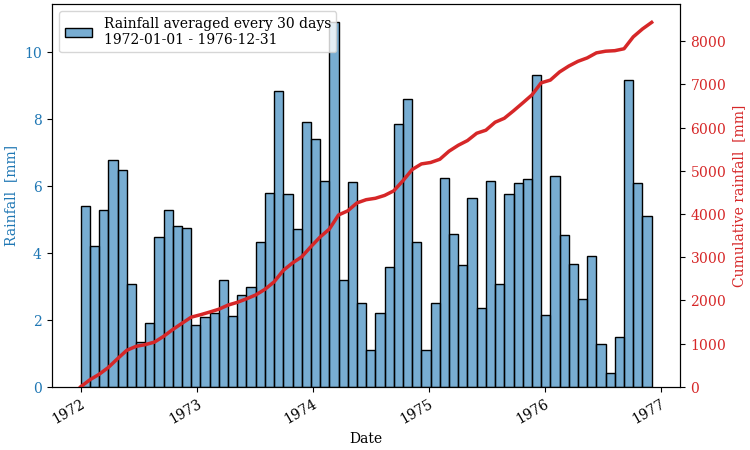

In [16]:
fig, ax1 = plt.subplots(figsize=(7.5, 4.5))
ax2 = ax1.twinx()

# Rainfall averaged every n_days days as a bar plot
ax1.bar(df_range_avg['start_date'], df_range_avg['avg_daily_rain'], color=mpl.colors.to_rgba('C0', 0.6), edgecolor='k',
        width=n_days-1, align='edge', label=f'Rainfall averaged every {n_days} days\n{date_ini} - {date_end}')

date_range = pd.concat([pd.Series([df_range_avg['start_date'].iloc[0]]), df_range_avg['date']])
cumulative_rainfall = np.hstack((0, df_range_avg['cumulative_rain']))
ax2.plot(date_range, cumulative_rainfall, color='C3', lw=2.5)

ax1.legend(loc='upper left')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall  [mm]', color='C0')
ax2.set_ylabel('Cumulative rainfall  [mm]', color='C3')
ax2.set_ylim(0, ax2.get_ylim()[1])

fig.canvas.header_visible = False
fig.canvas.toolbar_position = 'bottom'
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.setp(ax1.get_yticklabels(), color='C0')
plt.setp(ax2.get_yticklabels(), color='C3')
plt.show()

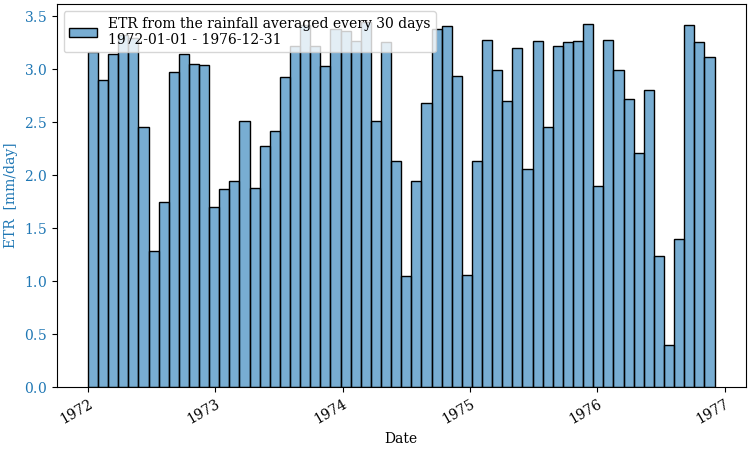

In [17]:
fig, ax1 = plt.subplots(figsize=(7.5, 4.5))

# ETR from the rainfall averaged every n_days days as a bar plot
ax1.bar(df_range_avg['start_date'], df_range_avg['avg_ETR'], color=mpl.colors.to_rgba('C0', 0.6), edgecolor='k',
        width=n_days-1, align='edge', label=f'ETR from the rainfall averaged every {n_days} days\n{date_ini} - {date_end}')

date_range = pd.concat([pd.Series([df_range_avg['start_date'].iloc[0]]), df_range_avg['date']])
cumulative_rainfall = np.hstack((0, df_range_avg['cumulative_rain']))
ax2.plot(date_range, cumulative_rainfall, color='C3', lw=2.5)

ax1.legend(loc='upper left')
ax1.set_xlabel('Date')
ax1.set_ylabel('ETR  [mm/day]', color='C0')

fig.canvas.header_visible = False
fig.canvas.toolbar_position = 'bottom'
plt.setp(ax1.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
plt.setp(ax1.get_yticklabels(), color='C0')
plt.show()